In [57]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

In [2]:
df_purchase = pd.read_csv('purchase+data.csv')

scaler = pickle.load(open('scaler.pkl', 'rb'))
pca = pickle.load(open('pca.pkl', 'rb'))
kmeans_pca = pickle.load(open('km_pca.pkl', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
f_std = scaler.transform(features)
f_pca = pca.transform(f_std)
seg = kmeans_pca.predict(f_pca)

df = df_purchase.copy()
df['Segment'] = seg
segment_dummies = pd.get_dummies(seg, prefix = 'Segment', prefix_sep = '_')
df = pd.concat([df, segment_dummies], axis = 1)

df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,True,False,False,False
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,True,False,False,False
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,True,False,False,False
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,True,False,False,False
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,True,False,False,False


Predict Purchase Incidence with Logistic Regression

In [3]:
y = df['Incidence']
df['mean_price'] = df.loc[:,'Price_1':'Price_5'].sum(axis=1)/5
X = df[['mean_price']]

In [4]:
purchase_model = LogisticRegression()
purchase_model.fit(X,y)

LogisticRegression()

In [5]:
purchase_model.coef_

array([[-2.35144634]])

In [6]:
df.loc[:,'Price_1':'Price_5'].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [7]:
 #price 0.5 ~ 3.5

 price_range = np.arange(0.5,3.5,0.01)

 y_pr = purchase_model.predict_proba(pd.DataFrame(price_range))

 purchase_pred = y_pr[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [8]:
elasiticity = purchase_model.coef_[:,0] * price_range * (1-purchase_pred)
df_price_elasticties = pd.DataFrame({'price point':price_range, 'elast':elasiticity})

In [9]:
df_price_elasticties.head()

,price point,elast
0,0.50,-0.096091
1,0.51,-0.100151
2,0.52,-0.104337
3,0.53,-0.108653
4,0.54,-0.113102


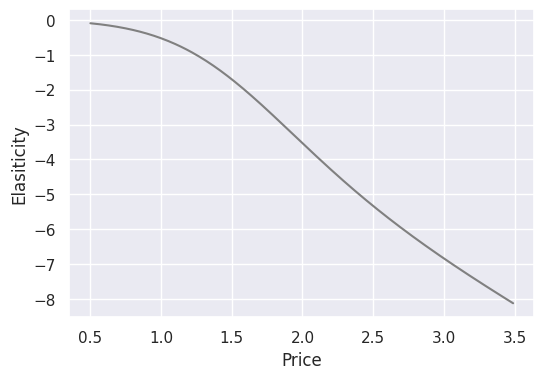

In [10]:
plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'], df_price_elasticties['elast'], color='grey')
plt.xlabel('Price')
plt.ylabel('Elasiticity')
plt.show()

In [11]:
#price 1.25
#with price lower than 1.25 we can increase price without losing too much customers

Purchase by Segments

In [12]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,mean_price
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,1,110866,1,0,0,True,False,False,False,2.044
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,True,False,False,False,2.028
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0,True,False,False,False,2.028
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,1,110866,1,0,0,True,False,False,False,2.028
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,1,110866,1,0,0,True,False,False,False,2.030


In [13]:
df_seg0 = df.loc[df['Segment']==0]

y = df_seg0['Incidence']
X = df_seg0[['mean_price']]

model_seg0 = LogisticRegression()
model_seg0.fit(X,y)

LogisticRegression()

In [14]:
model_seg0.coef_

array([[-2.5004972]])

In [15]:
y_pred0 = model_seg0.predict_proba(pd.DataFrame(price_range))

purchase_pred0 = y_pred0[:,1]

pe0 = model_seg0.coef_[:,0] * price_range * (1-purchase_pred0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
df_price_elasticties['PE_seg0'] = pe0

Segment 1

In [17]:
df_seg1 = df.loc[df['Segment']==1]

y = df_seg1['Incidence']
X = df_seg1[['mean_price']]

model_seg1 = LogisticRegression()
model_seg1.fit(X,y)

y_pred1 = model_seg1.predict_proba(pd.DataFrame(price_range))

purchase_pred1 = y_pred1[:,1]

pe1 = model_seg1.coef_[:,0] * price_range * (1-purchase_pred1)
df_price_elasticties['PE_seg1'] = pe1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Segment 2

In [18]:
df_seg2 = df.loc[df['Segment']==2]

y = df_seg2['Incidence']
X = df_seg2[['mean_price']]

model_seg2 = LogisticRegression()
model_seg2.fit(X,y)

y_pred2 = model_seg2.predict_proba(pd.DataFrame(price_range))

purchase_pred2 = y_pred2[:,1]

pe2 = model_seg2.coef_[:,0] * price_range * (1-purchase_pred2)
df_price_elasticties['PE_seg2'] = pe2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
df_seg3 = df.loc[df['Segment']==3]

y = df_seg3['Incidence']
X = df_seg3[['mean_price']]

model_seg3 = LogisticRegression()
model_seg3.fit(X,y)

y_pred3 = model_seg3.predict_proba(pd.DataFrame(price_range))

purchase_pred3 = y_pred3[:,1]

pe3 = model_seg3.coef_[:,0] * price_range * (1-purchase_pred3)
df_price_elasticties['PE_seg3'] = pe3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


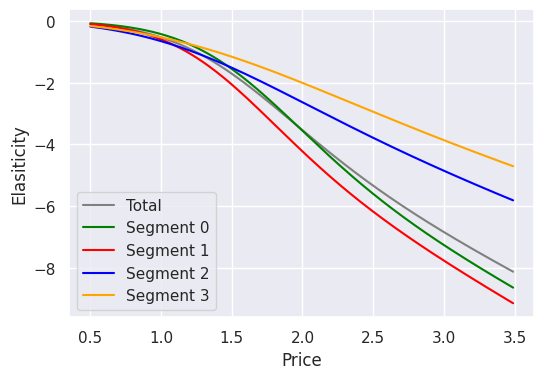

In [20]:
plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'], df_price_elasticties['elast'], color='grey',label='Total')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['PE_seg0'], color='green',label='Segment 0')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['PE_seg1'], color='red',label='Segment 1')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['PE_seg2'], color='blue',label='Segment 2')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['PE_seg3'], color='orange',label='Segment 3')
plt.xlabel('Price')
plt.ylabel('Elasiticity')
plt.legend()
plt.show()

Purchase Predict with Promotion

In [21]:
df['mean_promo'] = df.loc[:,'Promotion_1':'Promotion_5'].sum(axis=1)/5

y = df['Incidence']
X = df[['mean_price','mean_promo']]

model2 = LogisticRegression()
model2.fit(X,y)

model2.coef_

array([[-1.50889842,  0.55637772]])

In [22]:
df_price_elasticity_promotion = pd.DataFrame({'price':price_range})
df_price_elasticity_promotion['promo'] = 1

y_promo = model2.predict_proba(np.array(df_price_elasticity_promotion))

promo = y_promo[:,1]

price_elasticity_promo = (model2.coef_[:, 0] * price_range) * (1 - promo)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
df_price_elasticties['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticties

,price point,elast,PE_seg0,PE_seg1,PE_seg2,PE_seg3,Elasticity_Promotion_1
0,0.50,-0.096091,-0.068383,-0.095049,-0.177250,-0.158684,-0.125074
1,0.51,-0.100151,-0.071418,-0.099347,-0.183247,-0.163642,-0.129189
2,0.52,-0.104337,-0.074557,-0.103794,-0.189365,-0.168685,-0.133385
3,0.53,-0.108653,-0.077802,-0.108394,-0.195605,-0.173812,-0.137661
4,0.54,-0.113102,-0.081156,-0.113153,-0.201969,-0.179025,-0.142019
...,...,...,...,...,...,...,...
295,3.45,-8.024905,-8.534409,-9.039062,-5.735560,-4.637926,-4.917098
296,3.46,-8.050185,-8.561408,-9.066533,-5.754554,-4.654671,-4.935448
297,3.47,-8.075431,-8.588366,-9.093979,-5.773523,-4.671393,-4.953767
298,3.48,-8.100643,-8.615283,-9.121401,-5.792468,-4.688092,-4.972055


In [24]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

df_price_elasticity_promotion_no['Promotion'] = 0

Y_no_promo = model2.predict_proba(np.array(df_price_elasticity_promotion_no))
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model2.coef_[:, 0] * price_range *(1- no_promo)
df_price_elasticties['Elasticity_Promotion_0'] = price_elasticity_no_promo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

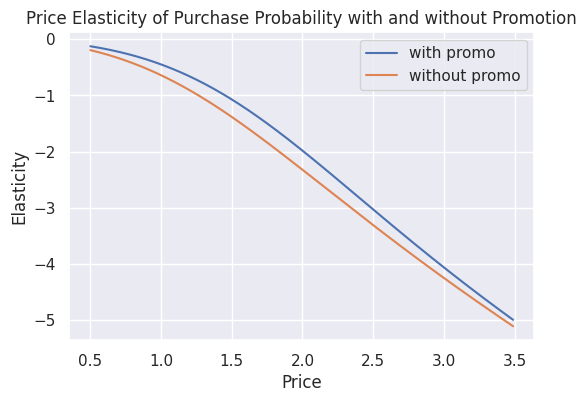

In [25]:
plt.figure(figsize = (6, 4))
plt.plot(df_price_elasticties['price point'], df_price_elasticties['Elasticity_Promotion_1'],label='with promo')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['Elasticity_Promotion_0'],label='without promo')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

Brand Purchase

In [26]:
brand_purchase = df.loc[df['Incidence']==1]

brand_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,mean_price,mean_promo
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,110866,1,0,0,True,False,False,False,2.030,0.0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,110866,1,0,0,True,False,False,False,1.988,0.4
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,110866,1,0,0,True,False,False,False,2.000,0.2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,110866,1,0,0,True,False,False,False,1.878,0.4
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,110866,1,0,0,True,False,False,False,1.914,0.6


In [27]:
y = brand_purchase['Brand']

features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']

X = brand_purchase[features]

brand_model = LogisticRegression(solver='sag')
brand_model.fit(X,y)

LogisticRegression(solver='sag')

In [28]:
brand_model.coef_

array([[-3.91596349,  0.65845801,  2.41770324,  0.70408065, -0.20211618],
       [ 1.27460706, -1.87985666, -0.21266578, -0.2063437 ,  0.5878647 ],
       [ 1.62421226,  0.5621166 ,  0.50096757,  1.03952069,  0.45281408],
       [ 0.57452976,  0.39558538, -1.4006343 , -1.2462472 ,  0.24934266],
       [ 0.44261441,  0.26369668, -1.30537073, -0.29101042, -1.08790526]])

In [29]:
brand_coef = pd.DataFrame(np.transpose(brand_model.coef_))
coef = ['coef_b1','coef_b2','coef_b3','coef_b4','coef_b5']
brand_coef.columns = [coef]
brand_coef.index = [features]
brand_coef = brand_coef.round(2)
brand_coef

,coef_b1,coef_b2,coef_b3,coef_b4,coef_b5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [30]:
brand5 = pd.DataFrame({'Price_5':price_range})
brand5['Price_1'] = brand_purchase['Price_1'].mean()
brand5['Price_2'] = brand_purchase['Price_2'].mean()
brand5['Price_3'] = brand_purchase['Price_3'].mean()
brand5['Price_4'] = brand_purchase['Price_4'].mean()
brand5.head()

,Price_5,Price_1,Price_2,Price_3,Price_4
0,0.50,1.384559,1.764717,2.006694,2.159658
1,0.51,1.384559,1.764717,2.006694,2.159658
2,0.52,1.384559,1.764717,2.006694,2.159658
3,0.53,1.384559,1.764717,2.006694,2.159658
4,0.54,1.384559,1.764717,2.006694,2.159658


In [31]:
brand5 = brand5[features]
brand5.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54


In [32]:
brand_pred = brand_model.predict_proba(brand5)

pred5 = brand_pred[:,4]

In [33]:
beta5 = brand_coef.iloc[4,4]
beta5

-1.09

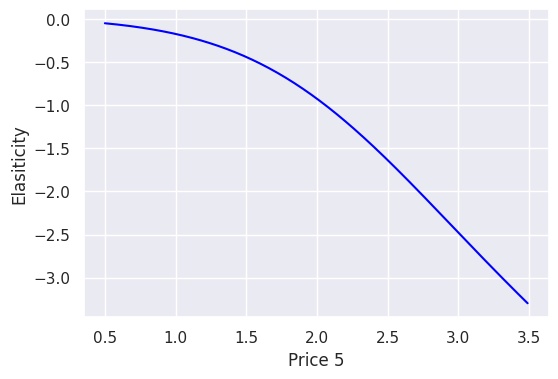

In [34]:
brand5_pe = beta5 * price_range * (1-pred5)

df_price_elasticties['brand5_elasticity'] = brand5_pe

plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'],df_price_elasticties['brand5_elasticity'],color='blue')
plt.xlabel('Price 5')
plt.ylabel('Elasiticity')
plt.show()

Cross price elasticity brand 5

In [35]:
brand45 = pd.DataFrame({'Price_4':price_range})
brand45['Price_1'] = brand_purchase['Price_1'].mean()
brand45['Price_2'] = brand_purchase['Price_2'].mean()
brand45['Price_3'] = brand_purchase['Price_3'].mean()
brand45['Price_5'] = brand_purchase['Price_5'].mean()
brand45 = brand45[features]
brand45.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


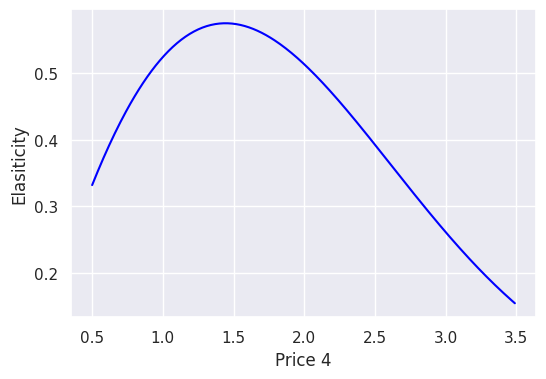

In [36]:
pred = brand_model.predict_proba(brand45)

pred4 = pred[:,3]

# In order to calculate the cross brand price elasticity, we need to use the new formula we introduced in the lecture.
# The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand,
# further multiplied by the probability for choosing the cross brand.
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pred4

df_price_elasticties['Brand5_cross_brand4_elasticity'] = brand5_cross_brand4_price_elasticity

plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'],df_price_elasticties['Brand5_cross_brand4_elasticity'],color='blue')
plt.xlabel('Price 4')
plt.ylabel('Elasiticity')
plt.show()

In [37]:
brand_seg3 = df.loc[(df['Incidence']==1)&(df['Segment']==3)]

brand_seg3.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,mean_price,mean_promo
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,159052,2,1,3,False,False,False,True,2.044,0.0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,159052,2,1,3,False,False,False,True,2.022,0.2
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,159052,2,1,3,False,False,False,True,2.008,0.0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,159052,2,1,3,False,False,False,True,1.990,0.4
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,159052,2,1,3,False,False,False,True,2.022,0.2


In [38]:
Y = brand_seg3['Brand']
#brand_seg3 = pd.get_dummies(brand_seg3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_seg3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag')
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coef]
bc_coef.index = [features]
bc_coef = bc_coef.round(2)
bc_coef

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,coef_b1,coef_b2,coef_b3,coef_b4,coef_b5
Price_1,-2.24,1.26,0.73,0.30,-0.05
Price_2,-0.93,-1.35,1.18,0.79,0.32
Price_3,1.90,-1.58,-0.56,0.04,0.21
Price_4,2.53,0.64,-0.26,-1.71,-1.19
Price_5,-0.98,-0.29,1.05,0.58,-0.36


In [39]:
seg3_brand5 = pd.DataFrame({'Price_5':price_range})
seg3_brand5['Price_1'] = brand_seg3['Price_1'].mean()
seg3_brand5['Price_2'] = brand_seg3['Price_2'].mean()
seg3_brand5['Price_3'] = brand_seg3['Price_3'].mean()
seg3_brand5['Price_4'] = brand_seg3['Price_4'].mean()
seg3_brand5 = seg3_brand5[features]
seg3_brand5.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.388244,1.77806,2.004386,2.156257,0.50
1,1.388244,1.77806,2.004386,2.156257,0.51
2,1.388244,1.77806,2.004386,2.156257,0.52
3,1.388244,1.77806,2.004386,2.156257,0.53
4,1.388244,1.77806,2.004386,2.156257,0.54


In [40]:
pred_b5s3 = model_brand_choice_s3.predict_proba(seg3_brand5)
pred = pred_b5s3[:,4]

beta5 = bc_coef.iloc[4,4]

seg3_brand5_pe = beta5 * price_range * (1-pred)


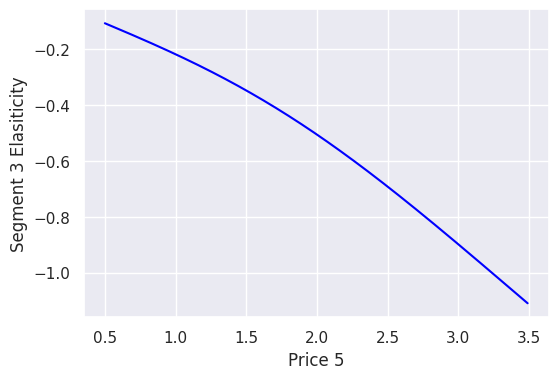

In [41]:
df_price_elasticties['seg3_brand5_elasticity'] = seg3_brand5_pe

plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'],df_price_elasticties['seg3_brand5_elasticity'],color='blue')
plt.xlabel('Price 5')
plt.ylabel('Segment 3 Elasiticity')
plt.show()

In [42]:
seg3_brand5_cross4 = pd.DataFrame({'Price_4':price_range})
seg3_brand5_cross4['Price_1'] = brand_seg3['Price_1'].mean()
seg3_brand5_cross4['Price_2'] = brand_seg3['Price_2'].mean()
seg3_brand5_cross4['Price_3'] = brand_seg3['Price_3'].mean()
seg3_brand5_cross4['Price_5'] = brand_seg3['Price_5'].mean()
seg3_brand5_cross4 = seg3_brand5_cross4[features]
seg3_brand5_cross4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.388244,1.77806,2.004386,0.50,2.654176
1,1.388244,1.77806,2.004386,0.51,2.654176
2,1.388244,1.77806,2.004386,0.52,2.654176
3,1.388244,1.77806,2.004386,0.53,2.654176
4,1.388244,1.77806,2.004386,0.54,2.654176


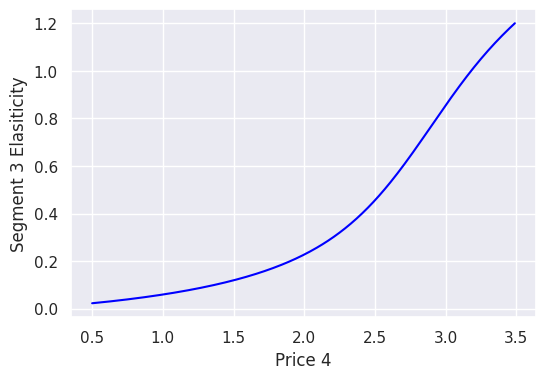

In [43]:
seg3_brand5_cross4_pred = model_brand_choice_s3.predict_proba(seg3_brand5_cross4)
pred = seg3_brand5_cross4_pred[:,3]


seg3_brand5_cross4_pe = -beta5 * price_range * (1-pred)

df_price_elasticties['seg3_brand5_cross4_elasticity'] = seg3_brand5_cross4_pe

plt.figure(figsize=(6,4))
plt.plot(df_price_elasticties['price point'],df_price_elasticties['seg3_brand5_cross4_elasticity'],color='blue')
plt.xlabel('Price 4')
plt.ylabel('Segment 3 Elasiticity')
plt.show()

Segment 0

In [44]:
brand_choice_s0 = df.loc[(df['Incidence']==1)&(df['Segment']==0)]

Y = brand_choice_s0['Brand']
#brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag')
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coef]
bc_coef.index = [features]
bc_coef = bc_coef.round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: , 4]

beta5 = bc_coef.iloc[4,4]
# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticties.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

In [46]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticties.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

In [47]:
brand_choice_s1 = df.loc[(df['Incidence']==1)&(df['Segment']==1)]

Y = brand_choice_s1['Brand']
#brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag')
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coef]
bc_coef.index = [features]
bc_coef = bc_coef.round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: , 4]

beta5 = bc_coef.iloc[4,4]
#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticties['Brand 5 S1'] = own_price_elasticity_brand_5_s1

In [49]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticties['Brand_5_Cross_Brand_4_S1'] = brand5_cross_brand4_price_elasticity_s1

In [50]:
brand_choice_s2 = df.loc[(df['Incidence']==1)&(df['Segment']==2)]

Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag')
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coef]
bc_coef.index = [features]
bc_coef = bc_coef.round(2)

beta5 = bc_coef.iloc[4,4]

# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticties['Brand 5 S2'] = own_price_elasticity_brand_5_s2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticties['Brand_5_Cross_Brand_4_S2'] = brand5_cross_brand4_price_elasticity_s2


In [52]:
df_price_elasticties

,price point,elast,PE_seg0,PE_seg1,PE_seg2,PE_seg3,Elasticity_Promotion_1,Elasticity_Promotion_0,brand5_elasticity,Brand5_cross_brand4_elasticity,Brand 5 S0,Brand_5_Cross_Brand_4_S0,seg3_brand5_elasticity,seg3_brand5_cross4_elasticity,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096091,-0.068383,-0.095049,-0.177250,-0.158684,-0.125074,-0.194207,-0.049055,0.332011,-0.021720,0.115653,-0.106746,0.023058,-0.007843,0.569600,-0.106619,0.131725
1,0.51,-0.100151,-0.071418,-0.099347,-0.183247,-0.163642,-0.129189,-0.200319,-0.050616,0.337287,-0.022334,0.117080,-0.108876,0.023638,-0.008260,0.576864,-0.109261,0.133456
2,0.52,-0.104337,-0.074557,-0.103794,-0.189365,-0.168685,-0.133385,-0.206535,-0.052206,0.342507,-0.022956,0.118474,-0.111008,0.024223,-0.008696,0.583968,-0.111926,0.135153
3,0.53,-0.108653,-0.077802,-0.108394,-0.195605,-0.173812,-0.137661,-0.212855,-0.053827,0.347668,-0.023587,0.119837,-0.113141,0.024814,-0.009152,0.590912,-0.114614,0.136818
4,0.54,-0.113102,-0.081156,-0.113153,-0.201969,-0.179025,-0.142019,-0.219281,-0.055477,0.352773,-0.024227,0.121168,-0.115277,0.025410,-0.009628,0.597697,-0.117324,0.138449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.024905,-8.534409,-9.039062,-5.735560,-4.637926,-4.917098,-5.036241,-3.231574,0.162233,-1.252115,0.034307,-1.092083,1.177610,-8.651747,0.054508,-2.446266,0.038249
296,3.46,-8.050185,-8.561408,-9.066533,-5.754554,-4.654671,-4.935448,-5.053302,-3.247768,0.160333,-1.261537,0.033971,-1.096414,1.183300,-8.679376,0.053483,-2.457714,0.037820
297,3.47,-8.075431,-8.588366,-9.093979,-5.773523,-4.671393,-4.953767,-5.070343,-3.263930,0.158447,-1.270986,0.033639,-1.100745,1.188932,-8.706936,0.052475,-2.469143,0.037396
298,3.48,-8.100643,-8.615283,-9.121401,-5.792468,-4.688092,-4.972055,-5.087364,-3.280059,0.156575,-1.280462,0.033308,-1.105076,1.194507,-8.734428,0.051483,-2.480552,0.036975


Text(0.5, 0, 'Price 4')

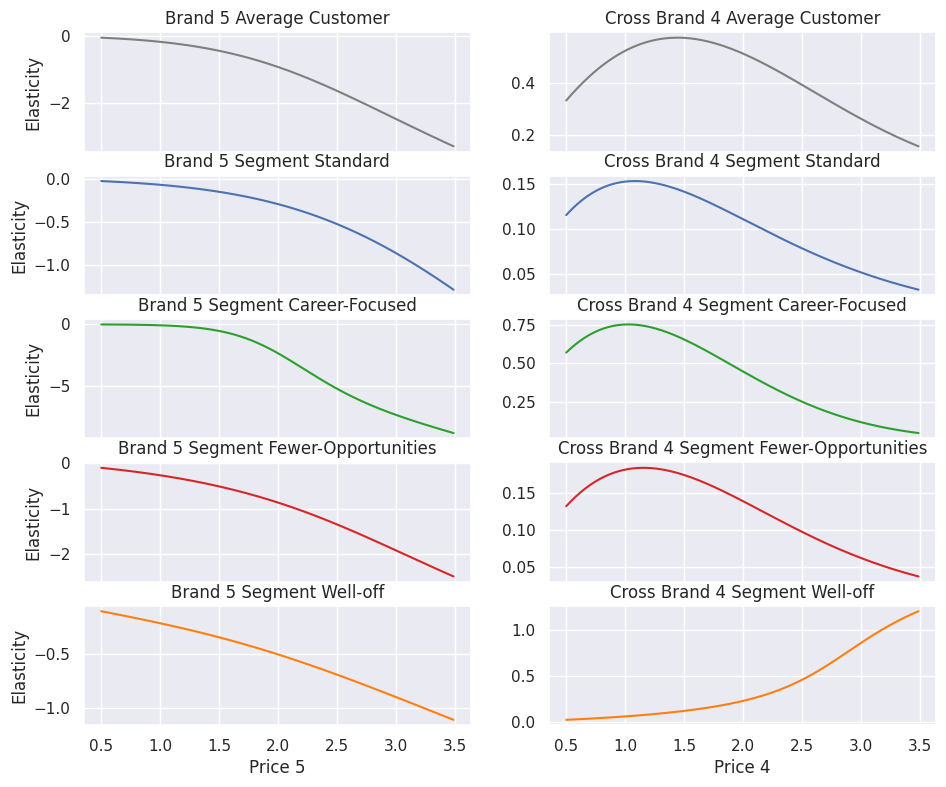

In [53]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(df_price_elasticties['price point'], df_price_elasticties['brand5_elasticity'], 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(df_price_elasticties['price point'], df_price_elasticties['Brand5_cross_brand4_elasticity'], 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, seg3_brand5_pe, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, seg3_brand5_cross4_pe, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

Purchase Quantity

In [54]:
purchase_quant = df.loc[df['Incidence']==1]

purchase_quant = pd.get_dummies(purchase_quant, columns=['Brand'], prefix='Brand', prefix_sep='_')
purchase_quant.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,mean_price,mean_promo
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.255431,1.993985,0.187895
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.159187,0.052734,0.167939
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000,1.872000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,0.000000,1.966000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,1.000000,2.002000,0.200000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,2.000000,2.030000,0.200000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000,2.102000,0.600000


In [55]:
purchase_quant['Price_Incidence'] = (purchase_quant['Price_1']*purchase_quant['Brand_1']+
                                     purchase_quant['Price_2']*purchase_quant['Brand_2']+
                                     purchase_quant['Price_3']*purchase_quant['Brand_3']+
                                     purchase_quant['Price_4']*purchase_quant['Brand_4']+
                                     purchase_quant['Price_5']*purchase_quant['Brand_5'])

In [56]:
purchase_quant['Promo_Incidence'] = (purchase_quant['Promotion_1']*purchase_quant['Brand_1']+
                                     purchase_quant['Promotion_2']*purchase_quant['Brand_2']+
                                     purchase_quant['Promotion_3']*purchase_quant['Brand_3']+
                                     purchase_quant['Promotion_4']*purchase_quant['Brand_4']+
                                     purchase_quant['Promotion_5']*purchase_quant['Brand_5'])

In [58]:
X = purchase_quant[['Price_Incidence','Promo_Incidence']]
y = purchase_quant['Quantity']

quantity_model = LinearRegression()
quantity_model.fit(X,y)
quantity_model.coef_

array([-0.8173651 , -0.10504673])

In [60]:
quantity_elasticity = pd.DataFrame({'Price_Incidence':price_range})
quantity_elasticity['Promo_Incidence'] = 1

beta = quantity_model.coef_[0]

pred_quant = quantity_model.predict(quantity_elasticity)

In [61]:
quan_elast = beta * price_range * (1 - pred_quant)

df_price_elasticties['quantity_elasticity'] = quan_elast


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

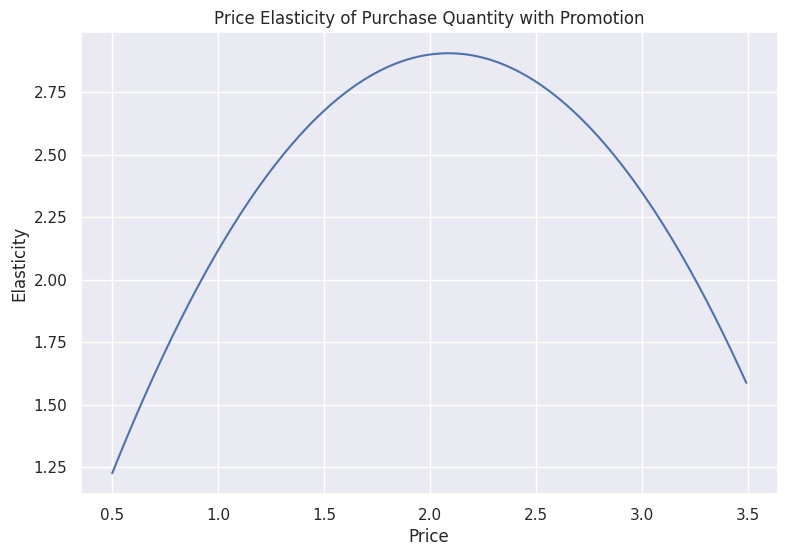

In [63]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, quan_elast)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [65]:
quantity_elasticity2 = pd.DataFrame({'Price_Incidence':price_range})
quantity_elasticity2['Promo_Incidence'] = 0


pred_quant2 = quantity_model.predict(quantity_elasticity2)

quant_elast2 = beta * price_range * (1 - pred_quant2)
df_price_elasticties['quantity_elasticity_without_promo'] = quant_elast2


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

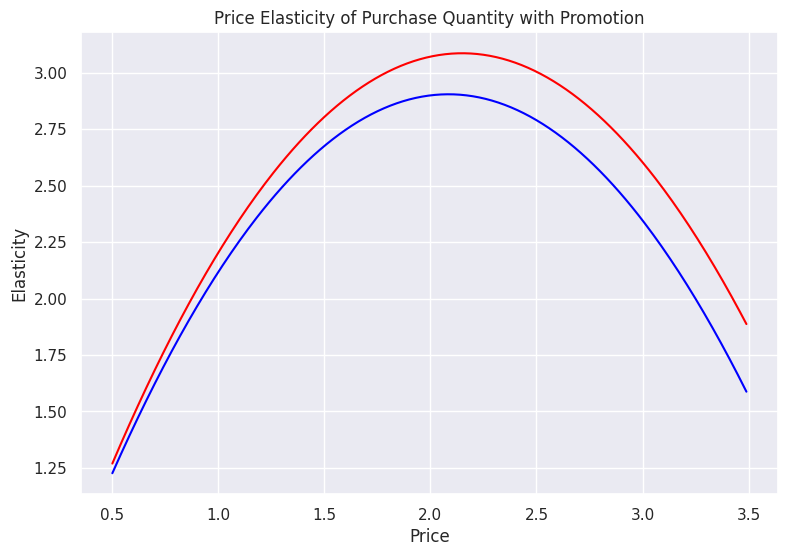

In [66]:
plt.figure(figsize = (9, 6))
plt.plot(df_price_elasticties['price point'], df_price_elasticties['quantity_elasticity'],color='blue')
plt.plot(df_price_elasticties['price point'], df_price_elasticties['quantity_elasticity_without_promo'],color='red')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')